In [1]:
import nltk
%matplotlib inline
nltk.download("punkt")
nltk.download("cmudict")

import sys
import streamlit as st
import os
import pandas as pd
import pickle
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px
import copy
import streamlit as st
import math
import scipy
import plotly.graph_objects as go
import shelve
import plotly.express as px
import pandas as pd
from random import sample
import click
from scipy.stats import pearsonr
from science_access.t_analysis import not_want_list

not_want_list.extend(
    ["link", "librarian", "issue", "abstract", "science", "cookie", "publication"]
)

from science_access.online_app_backend import call_from_front_end
from science_access.online_app_backend import ar_manipulation
from science_access.t_analysis import text_proc
from science_access.online_app_backend import semantic_scholar_alias



from science_access.enter_author_name import (
    art_cloud,
    create_giant_strings,
    art_cloud_wl,
    zipf_plot,
)
from science_access.enter_author_name import (
    distribution_plot_from_scrape,
    grand_distribution_plot,
    data_frames_from_scrape,
)
from science_access.enter_author_name import (
    push_frame_to_screen,
    fast_art_cloud,
    grab_data_for_splash,
)
from science_access.enter_author_name import (
    frame_to_lists,
    try_and_update_cache,
    extra_options,
)
import matplotlib.pyplot as plt



[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /home/user/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
/home/user/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.



In [2]:
author_name="Brian H Smith"
def do_science(author_name):
    ar = call_from_front_end(author_name, tns=10, fast=True)
    author = pd.DataFrame(ar)
    fig = plt.figure()
    plt.scatter(list(range(0,len(author["numCitedBy"]))),author["numCitedBy"],label="citedby")
    plt.scatter(list(range(0,len(author["numCitedBy"]))),author["standard"],label="readability")
    plt.legend()
    plt.show()
    corr, _ = pearsonr(author["numCitedBy"], author["standard"])
    print('Pearsons correlation: %.3f' % corr)
    fig = plt.figure()
    #from sklearn import datasets, linear_model
    #regr = linear_model.LinearRegression()

    # Train the model using the training sets
    #regr.fit(author["standard"], author["numCitedBy"])

    # Make predictions using the testing set
    #diabetes_y_pred = regr.predict(author["standard"])

    #plt.plot(author["standard"], author["numCitedBy"], color='blue', linewidth=3)

    
    plt.scatter(author["standard"],author["numCitedBy"])
    plt.ylabel("numCitedBy")
    plt.xlabel("readability")

    plt.show()

    return (author["numCitedBy"],author["standard"],author)


In [3]:
listed=[]
multi_author_frame = pd.DataFrame()

2021-06-11 10:43:57.138 WARNING root: 
  command:

    streamlit run /home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]


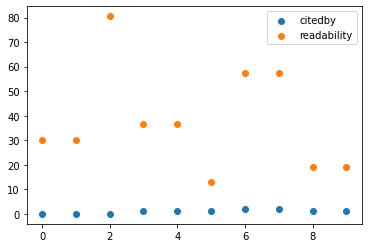

Pearsons correlation: 0.088


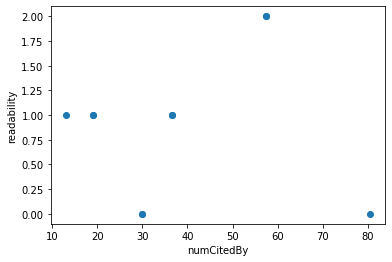

In [4]:
author_name="Patrick McGurrin"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])
listed.append((author_numCitedBy,author_standard))

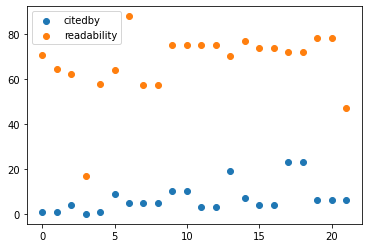

Pearsons correlation: 0.267


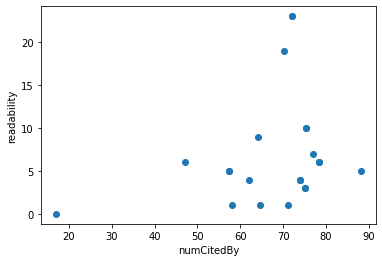

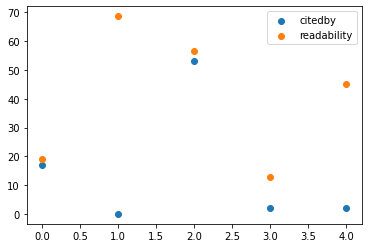

Pearsons correlation: 0.207


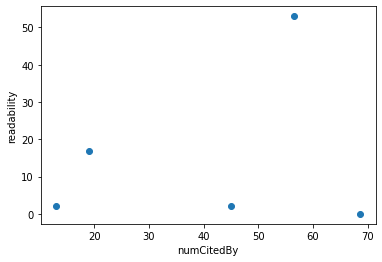

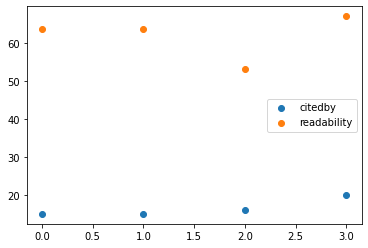

Pearsons correlation: 0.399


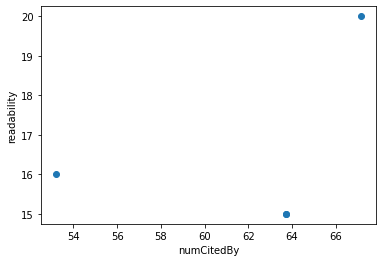

In [5]:
author_name="Brian H Smith"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))
author_name="Brian Usher"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))
author_name="Bradley Lusk"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))

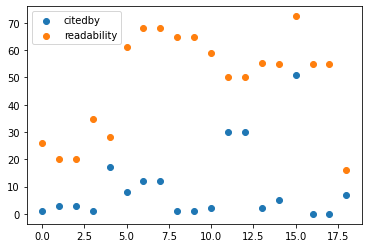

Pearsons correlation: 0.264


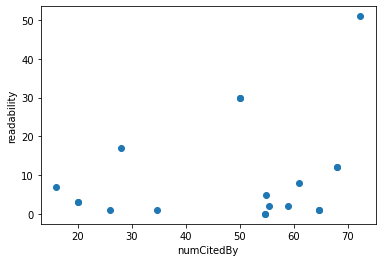

In [6]:
author_name="Thomas Close"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))

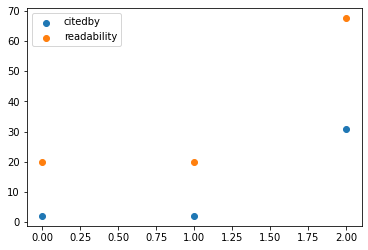

Pearsons correlation: 1.000


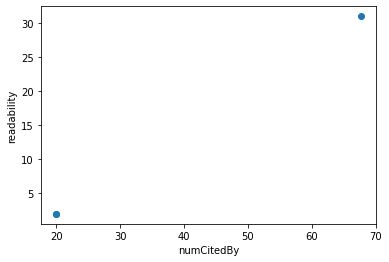

In [7]:
author_name="Rebecca Featherston"
(author_numCitedBy,author_standard,df) = do_science(author_name)
listed.append((author_numCitedBy,author_standard))
multi_author_frame = pd.concat([multi_author_frame,df])


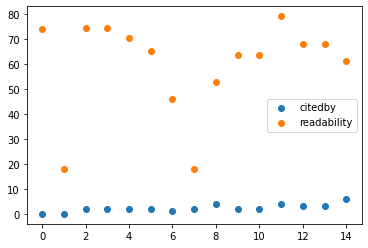

Pearsons correlation: 0.284


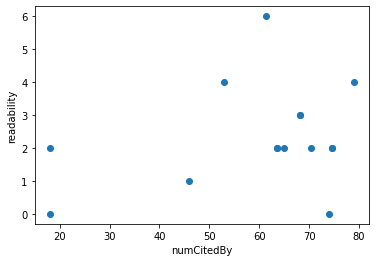

In [8]:
author_name="Paul Nicholas"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))

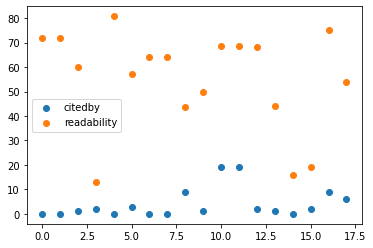

Pearsons correlation: 0.210


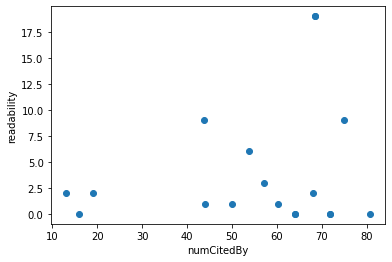

In [9]:
author_name="David Grayden"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))
author_name="Sayali Phatak"

(author_numCitedBy,author_standard) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])


In [24]:
multi_author_frame

,citationVelocity,fieldsOfStudy,numCitedBy,semantic,link,science,big_words,standard,fre_unbiased,standard_unbiased,hard_snippet,wcount,tokens,uniqueness,unique_words,sp,ss,sp_norm,ss_norm,gf
0,0,[Medicine],0,True,In vivo assessment of neurodegeneration in Spi...,True,[],30.000000,88.740000,23.0,,43,"[highlights, dti, study, reveals, brain, wide,...",0.906977,39,0.100000,0.400000,0.100000,0.400000,24.76
1,0,[Medicine],0,True,In vivo assessment of neurodegeneration in Spi...,True,[],30.000000,88.740000,23.0,,43,"[highlights, dti, study, reveals, brain, wide,...",0.906977,39,0.100000,0.400000,0.100000,0.400000,24.76
2,0,[Medicine],0,True,Thalamic Tremor Following Focused Ultrasound T...,True,[],80.535417,80.535417,15.0,,479,"[magnetic, resonance, guided, focused, ultraso...",0.463466,222,0.053717,0.317509,0.053717,0.317509,199.14
3,0,[Medicine],1,True,Electrophysiological Evidence for Functional (...,True,[],36.636667,36.636667,47.0,,102,"[background, there, is, little, published, wor...",0.696078,71,0.101562,0.328125,0.101562,0.328125,47.47
4,0,[Medicine],1,True,Electrophysiological Evidence for Functional (...,True,[],36.636667,36.636667,47.0,,102,"[background, there, is, little, published, wor...",0.696078,71,0.101562,0.328125,0.101562,0.328125,47.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0,[Medicine],1,True,Forecasting cycles of seizure likelihood,True,[],44.000000,82.988333,0.0,seizure unpredictability is rated as one of th...,93,"[seizure, unpredictability, is, rated, as, one...",0.752688,70,0.250000,0.750000,0.250000,0.750000,46.11
14,0,[Computer Science],0,True,A Convolutional Neural Network Model for Decod...,True,[],16.000000,60.726000,16.0,,137,"[brain, computer, interfaces, can, help, indiv...",0.656934,90,-0.014177,0.357684,0.014177,0.357684,62.10
15,0,[Medicine],2,True,Analysis of the capacitance of minimally insul...,True,[],19.000000,68.665556,46.0,,199,"[state, of, the, art, bioelectronic, implants,...",0.567839,113,0.020196,0.378824,0.020196,0.378824,87.24
16,0,[Medicine],9,True,Quantifying epileptogenesis in rats with spont...,True,[],75.037500,75.037500,13.0,,182,"[there, is, a, crucial, need, to, identify, bi...",0.582418,106,0.021930,0.184211,0.021930,0.184211,79.76


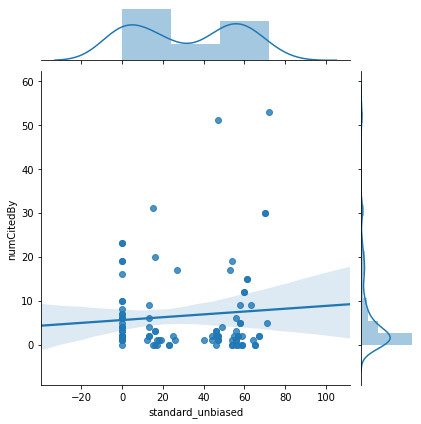

In [38]:
import seaborn as sns
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="standard_unbiased",kind="reg")

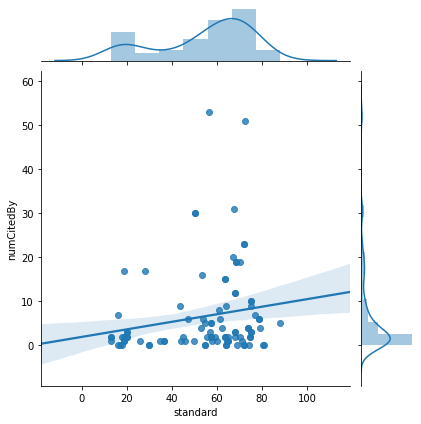

In [40]:
import seaborn as sns
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="standard",kind="reg")

Harder to read manuscripts where cited more often

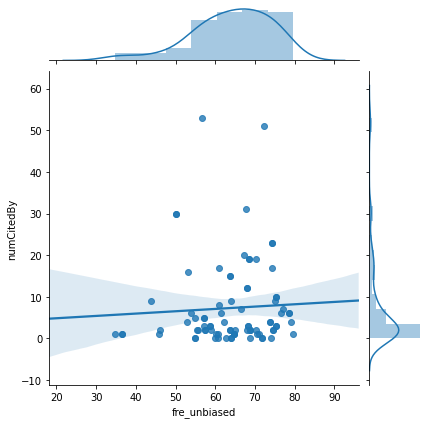

In [43]:
subset = multi_author_frame[multi_author_frame["fre_unbiased"]<=80]

sns.jointplot(data = subset,y="numCitedBy",x="fre_unbiased",kind="reg")

In [46]:
hard = multi_author_frame[multi_author_frame["fre_unbiased"]>=80]
hard["tokens"]
#sns.jointplot(data = subset,y="numCitedBy",x="fre_unbiased",kind="reg")

0     [highlights, dti, study, reveals, brain, wide,...
1     [highlights, dti, study, reveals, brain, wide,...
2     [magnetic, resonance, guided, focused, ultraso...
5     [highlights, back, averaging, is, a, useful, t...
8     [highlights, the, electrophysiological, charac...
9     [colton, smith, essay, provides, an, informati...
6     [heat, stress, elicits, the, expression, of, h...
3     [the, dilute, nitride, gaasn, has, been, grown...
7     [robotic, printing, applications, are, rapidly...
4     [objective, to, determine, the, utility, of, h...
13    [seizure, unpredictability, is, rated, as, one...
Name: tokens, dtype: object

In [36]:
subset = multi_author_frame[multi_author_frame["sp"]<=0.15]


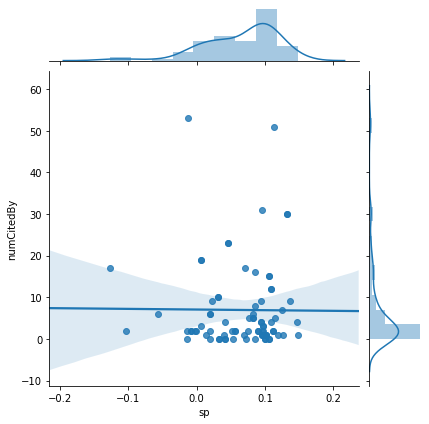

In [37]:
sns.jointplot(data = subset,y="numCitedBy",x="sp",kind="reg")

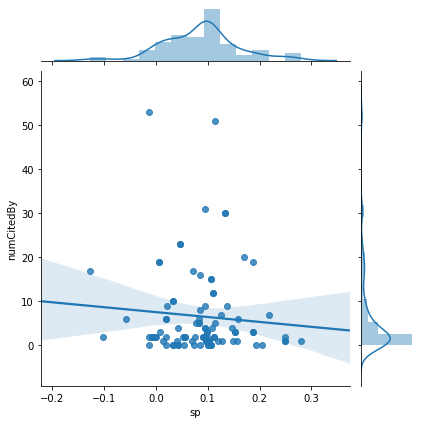

In [19]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="sp",kind="reg")

Articles with too much positive sentiment were cited less often

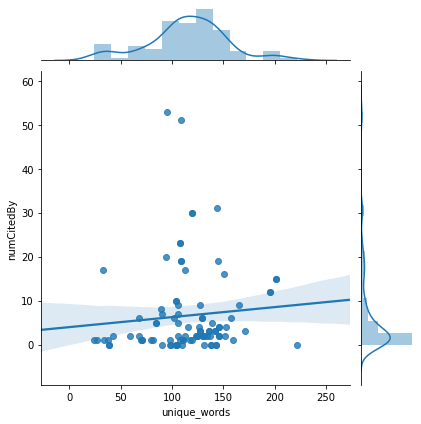

In [20]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="unique_words",kind="reg")

Articles with more unique words were cited more often

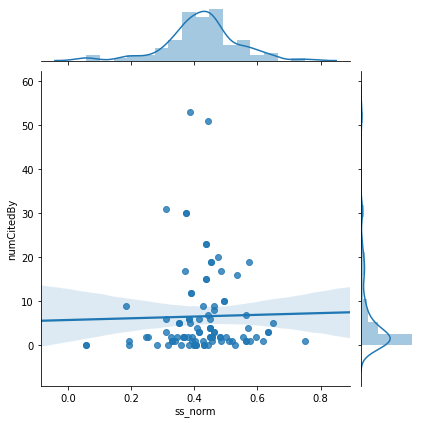

In [22]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="ss_norm",kind="reg")

Articles with more sentiment subjectivity were cited slightly more often (not statistically significant).

,citationVelocity,fieldsOfStudy,numCitedBy,semantic,link,science,big_words,standard,fre_unbiased,standard_unbiased,hard_snippet,wcount,tokens,uniqueness,unique_words,sp,ss,sp_norm,ss_norm,gf
0,0,[Medicine],0,True,In vivo assessment of neurodegeneration in Spi...,True,[],30.000000,88.740000,23.0,,43,"[highlights, dti, study, reveals, brain, wide,...",0.906977,39,0.100000,0.400000,0.100000,0.400000,24.76
1,0,[Medicine],0,True,In vivo assessment of neurodegeneration in Spi...,True,[],30.000000,88.740000,23.0,,43,"[highlights, dti, study, reveals, brain, wide,...",0.906977,39,0.100000,0.400000,0.100000,0.400000,24.76
2,0,[Medicine],0,True,Thalamic Tremor Following Focused Ultrasound T...,True,[],80.535417,80.535417,15.0,,479,"[magnetic, resonance, guided, focused, ultraso...",0.463466,222,0.053717,0.317509,0.053717,0.317509,199.14
3,0,[Medicine],1,True,Electrophysiological Evidence for Functional (...,True,[],36.636667,36.636667,47.0,,102,"[background, there, is, little, published, wor...",0.696078,71,0.101562,0.328125,0.101562,0.328125,47.47
4,0,[Medicine],1,True,Electrophysiological Evidence for Functional (...,True,[],36.636667,36.636667,47.0,,102,"[background, there, is, little, published, wor...",0.696078,71,0.101562,0.328125,0.101562,0.328125,47.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0,[Medicine],1,True,Forecasting cycles of seizure likelihood,True,[],44.000000,82.988333,0.0,seizure unpredictability is rated as one of th...,93,"[seizure, unpredictability, is, rated, as, one...",0.752688,70,0.250000,0.750000,0.250000,0.750000,46.11
14,0,[Computer Science],0,True,A Convolutional Neural Network Model for Decod...,True,[],16.000000,60.726000,16.0,,137,"[brain, computer, interfaces, can, help, indiv...",0.656934,90,-0.014177,0.357684,0.014177,0.357684,62.10
15,0,[Medicine],2,True,Analysis of the capacitance of minimally insul...,True,[],19.000000,68.665556,46.0,,199,"[state, of, the, art, bioelectronic, implants,...",0.567839,113,0.020196,0.378824,0.020196,0.378824,87.24
16,0,[Medicine],9,True,Quantifying epileptogenesis in rats with spont...,True,[],75.037500,75.037500,13.0,,182,"[there, is, a, crucial, need, to, identify, bi...",0.582418,106,0.021930,0.184211,0.021930,0.184211,79.76


In [10]:
listed2 = []
for l in listed:
    listed2.extend(l)
listed = listed2
author_numCitedBy = [x[0] for x in listed]
author_standard = [x[1] for x in listed]

listed.append((author_numCitedBy,author_standard))
#listed

In [11]:
print(len(author_standard))

16


In [12]:
print(len(author_numCitedBy))

16


In [13]:
listed
corr, _ = pearsonr(author_numCitedBy, author_standard)
print(corr)


0.7482788658664115


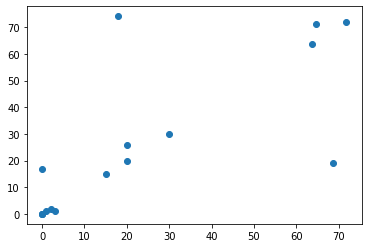

In [14]:
plt.scatter(author_standard,author_numCitedBy)
plt.show()